Project Directory: /Users/joniperez/Desktop/Folders/Data_Project
Looking for data at: /Users/joniperez/Desktop/Folders/Data_Project/data/processed/cleaned_cars.csv
File exists!
Loaded 4855 records

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_id          4855 non-null   int64  
 1   make            4855 non-null   object 
 2   model           4855 non-null   object 
 3   year            4855 non-null   int64  
 4   engine_size_cc  4855 non-null   float64
 5   fuel_type       4855 non-null   object 
 6   transmission    4855 non-null   object 
 7   listing_id      4855 non-null   int64  
 8   location        4855 non-null   object 
 9   listing_date    4855 non-null   object 
 10  listed_price    4855 non-null   float64
 11  mileage         4855 non-null   int64  
 12  vehicle_age     4855 non-null   int64  
 13  mile

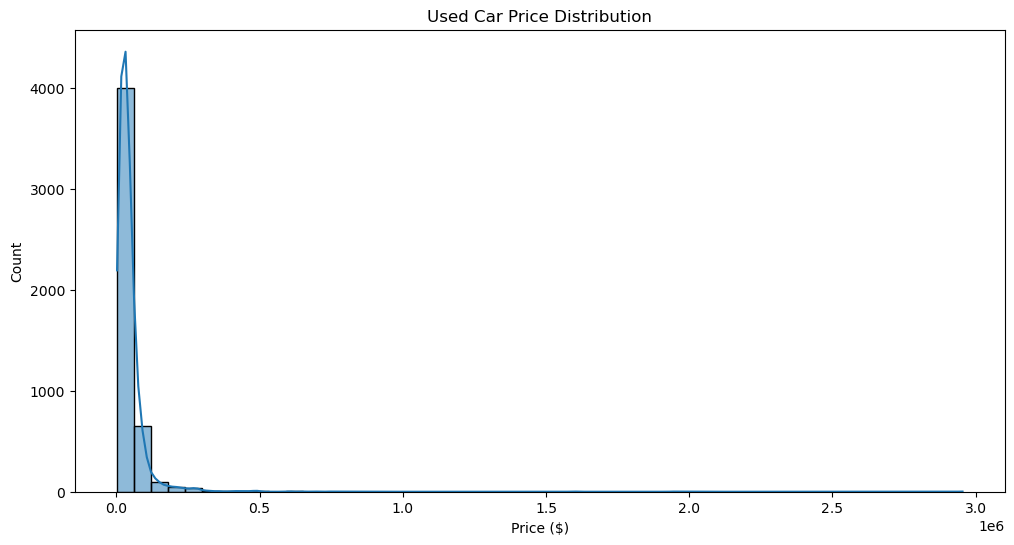

Saved top makes to: /Users/joniperez/Desktop/Folders/Data_Project/visualizations/top_makes.png


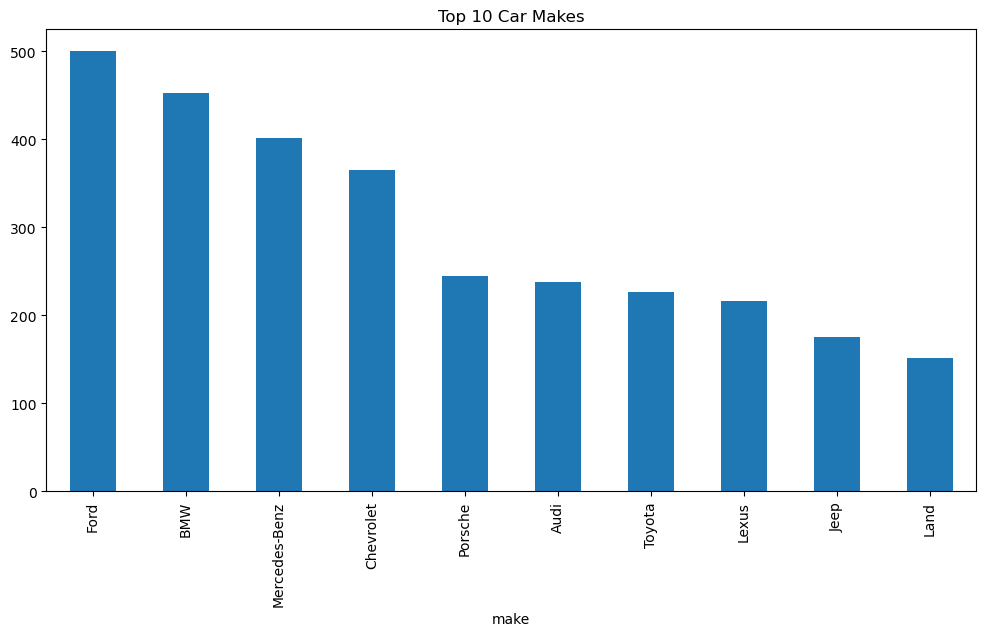

Saved price vs mileage to: /Users/joniperez/Desktop/Folders/Data_Project/visualizations/price_vs_mileage.png


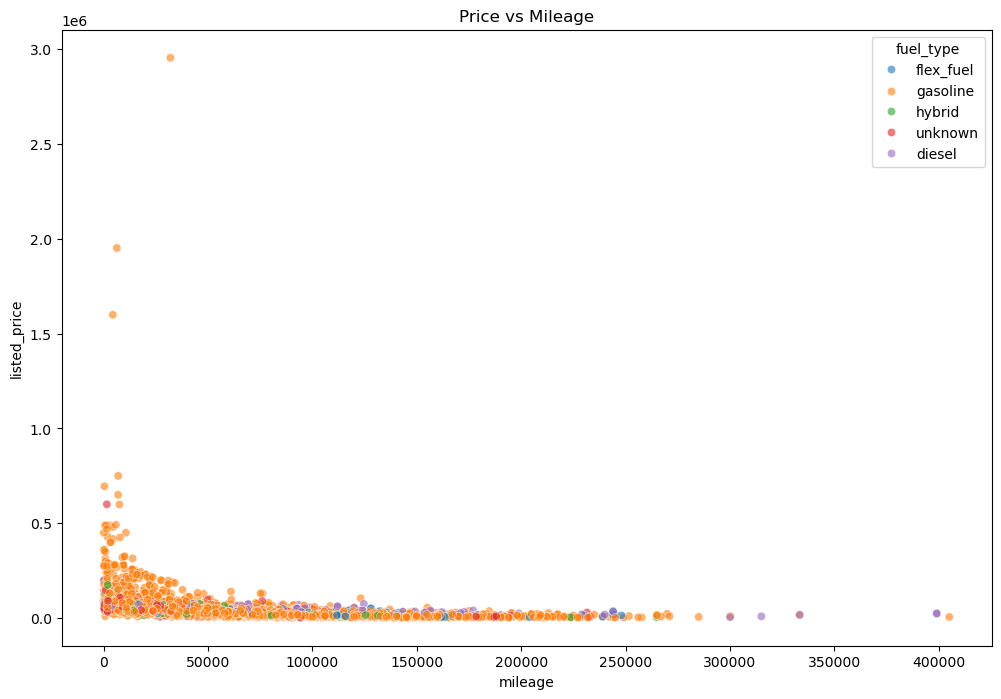

Saved correlation matrix to: /Users/joniperez/Desktop/Folders/Data_Project/visualizations/correlation_matrix.png


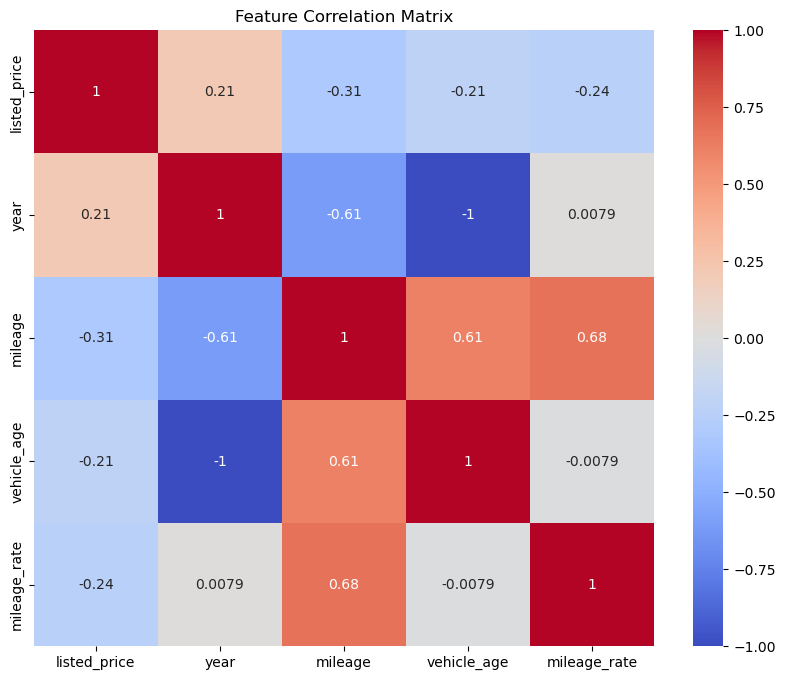

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
print(f"Project Directory: {project_dir}")

# Load cleaned data
cleaned_data_path = os.path.join(project_dir, 'data', 'processed', 'cleaned_cars.csv')
print(f"Looking for data at: {cleaned_data_path}")

# Check if file exists
if os.path.exists(cleaned_data_path):
    print("File exists!")
    df = pd.read_csv(cleaned_data_path)
    print(f"Loaded {len(df)} records")
else:
    print("File does not exist! Checking directory contents:")
    print(f"Contents of data/processed: {os.listdir(os.path.join(project_dir, 'data', 'processed'))}")
    raise FileNotFoundError(f"Could not find {cleaned_data_path}")

# Debug Visualization path
viz_dir = os.path.join(project_dir, 'visualizations')
os.makedirs(viz_dir, exist_ok=True)  

# Basic info
print("\nData Info:")
print(df.info())
print("\nData Description:")
print(df.describe())

# Visualization path
viz_dir = os.path.join(project_dir, 'visualizations')

# Price distribution
plt.figure(figsize=(12,6))
sns.histplot(df['listed_price'], bins=50, kde=True)
plt.title('Used Car Price Distribution')
plt.xlabel('Price ($)')
price_dist_path = os.path.join(viz_dir, 'price_distribution.png')
plt.savefig(price_dist_path)
print(f"Saved price distribution to: {price_dist_path}")
plt.show()

# Top 10 makes by count
plt.figure(figsize=(12,6))
df['make'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Car Makes')
top_makes_path = os.path.join(viz_dir, 'top_makes.png')
plt.savefig(top_makes_path)
print(f"Saved top makes to: {top_makes_path}")
plt.show()

# Price vs Mileage
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='mileage', y='listed_price', hue='fuel_type', alpha=0.6)
plt.title('Price vs Mileage')
price_mileage_path = os.path.join(viz_dir, 'price_vs_mileage.png')
plt.savefig(price_mileage_path)
print(f"Saved price vs mileage to: {price_mileage_path}")
plt.show()

# Correlation matrix
corr = df[['listed_price', 'year', 'mileage', 'vehicle_age', 'mileage_rate']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
corr_matrix_path = os.path.join(viz_dir, 'correlation_matrix.png')
plt.savefig(corr_matrix_path)
print(f"Saved correlation matrix to: {corr_matrix_path}")
plt.show()